# Decision Tree - ID3 algo

In [142]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import math
import itertools

import numpy as np
import pandas as pd
import ete3
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier

from decision_tree import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. ID3

To see the code for the **ID3** algorithm and the decision tree structure, see the file `decision_tree.py` in the same directory.

My algo only accepts either `pandas.Dataframe` or `pandas.Serie` as it was easier to handle each attributes.

## 1.1. Toy Problem: PlayTennis?

In [88]:
df_tennis = pd.read_csv('tennis.csv')
df_tennis.head(n=3)

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes


In [89]:
target_attr = df_tennis.columns.tolist()[-1]
attrs = df_tennis.columns.tolist()[:-1]

id3_tennis = ID3(criterion='infogain')
id3_tennis.fit(df_tennis, target_attr, attrs)
print('Score on training data:', id3_tennis.score(df_tennis))

Score on training data: 1.0


## 1.2. Sexy verbose

Done with the library `ete3`.

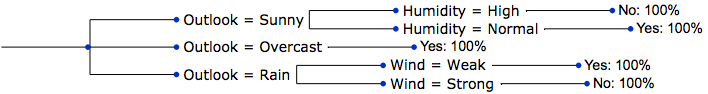

In [90]:
id3_tennis.display_tree()

## 1.3. Return of the Magic Muschroom!

Score on training data: 1.0


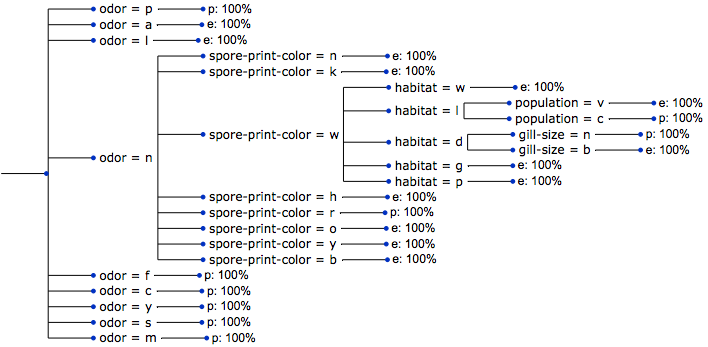

In [98]:
df_mushroom = pd.read_csv('agaricus-lepiota.csv')
target_attr = df_mushroom.columns.tolist()[0]
attrs = df_mushroom.columns.tolist()[1:]

id3_mushroom = ID3(criterion='infogain')
id3_mushroom.fit(df_mushroom, target_attr, attrs)
print('Score on training data:', id3_mushroom.score(df_mushroom))

id3_mushroom.display_tree()

# 2. Improvements

## 2.1. Selection of the attribute

### 2.1.1. Dataset *PlayTennis?*

In [ ]:
df_tennis = pd.read_csv('tennis.csv')
target_attr = df_tennis.columns.tolist()[-1]
attrs = df_tennis.columns.tolist()[:-1]

In [ ]:
id3_tennis = ID3(criterion='infogain')
id3_tennis.fit(df_tennis, target_attr, attrs)
print('Information Gain:')
id3_tennis.display_tree()

In [ ]:
id3_tennis = ID3(criterion='gainratio')
id3_tennis.fit(df_tennis, target_attr, attrs)
print('Gain ratio:')
id3_tennis.display_tree()

In [ ]:
id3_tennis = ID3(criterion='gini')
id3_tennis.fit(df_tennis, target_attr, attrs)
print('Gini Impurity:')
id3_tennis.display_tree()

### 2.1.2. Dataset *Mushroom*

In [ ]:
df_mushroom = pd.read_csv('agaricus-lepiota.csv')
target_attr = df_mushroom.columns.tolist()[0]
attrs = df_mushroom.columns.tolist()[1:]

In [ ]:
id3_mushroom = ID3(criterion='infogain')
id3_mushroom.fit(df_mushroom, target_attr, attrs)
print('Information Gain:')
id3_mushroom.display_tree()

In [ ]:
id3_mushroom = ID3(criterion='gainratio')
id3_mushroom.fit(df_mushroom, target_attr, attrs)
print('Gain ratio:')
id3_mushroom.display_tree()

In [ ]:
id3_mushroom = ID3(criterion='gini')
id3_mushroom.fit(df_mushroom, target_attr, attrs)
print('Gini Impurity:')
id3_mushroom.display_tree()

## 2.2. Continuous attributes

Instead of using the possible values of a categorical attribute, for a continuous attribute we use a split based on the mediane value.

If the target attribute is a continuous attribute, the leaf value is the mean of the examples present in this node.

### 2.2.1. Dataset *Iris*

Continuous attributes and categorical target attribute.

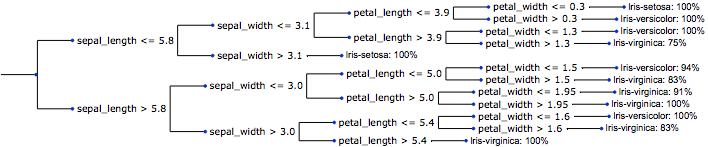

In [63]:
df_iris = pd.read_csv('iris.csv')
target_attr = df_iris.columns.tolist()[-1]
attrs = df_iris.columns.tolist()[:-1]


id3_iris = ID3(criterion='gini')
id3_iris.fit(df_iris, target_attr, attrs)
id3_iris.display_tree()

In [64]:
train, validate, test = np.split(df_iris.sample(frac=1), [int(.6*len(df_iris)), int(.8*len(df_iris))])
train.shape, validate.shape, test.shape

((90, 5), (30, 5), (30, 5))

0.9333333333333333 0.8333333333333334 0.8666666666666667


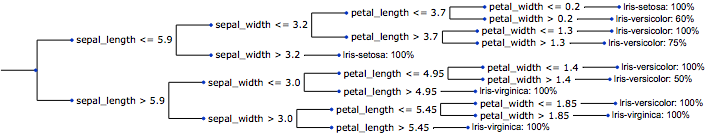

In [74]:
id3_iris = ID3(criterion='gini')
id3_iris.fit(train, target_attr, attrs)
print(id3_iris.score(train), id3_iris.score(validate), id3_iris.score(test))
id3_iris.display_tree()

cat 4 7
petal_width 1.0 0.5714285714285714
cat 4 7
petal_width 1.0 0.5714285714285714
cat 6 14
petal_length 0.7142857142857143 0.42857142857142855
cat 4 7
petal_width 0.42857142857142855 0.5714285714285714
cat 4 7
petal_width 0.14285714285714285 0.5714285714285714
cat 6 14
petal_length 0.7857142857142857 0.42857142857142855
cat 6 16
sepal_width 0.8125 0.375
cat 6 16
sepal_width 0.8125 0.375
cat 13 30
sepal_length 0.8666666666666667 0.43333333333333335
cat 3 3
petal_width 1.0 1.0
cat 3 3
petal_width 1.0 1.0
cat 7 11
petal_length 0.9090909090909091 0.6363636363636364
cat 7 11
petal_length 0.9090909090909091 0.6363636363636364
cat 9 14
sepal_width 0.9285714285714286 0.6428571428571429
cat 1 1
petal_width 1.0 1.0
cat 1 1
petal_width 1.0 1.0
cat 2 3
petal_length 1.0 0.6666666666666666
cat 2 3
petal_length 1.0 0.6666666666666666
cat 9 14
sepal_width 0.9285714285714286 0.6428571428571429
cat 13 30
sepal_length 0.8666666666666667 0.43333333333333335
0.8111111111111111 0.8666666666666667 0.8


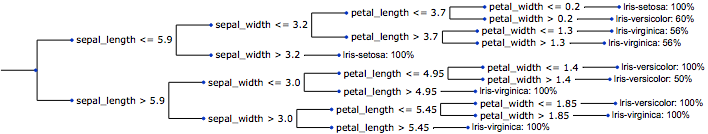

In [75]:
id3_iris.prune(validate)
print(id3_iris.score(train), id3_iris.score(validate), id3_iris.score(test))
id3_iris.display_tree()

### 2.2.2. Dataset *Auto-mpg*

https://archive.ics.uci.edu/ml/datasets/automobile

Not all features are used for the sake of a fancy display of the generated decision tree.

Categorical & continuous attributes and continuous target attribute.

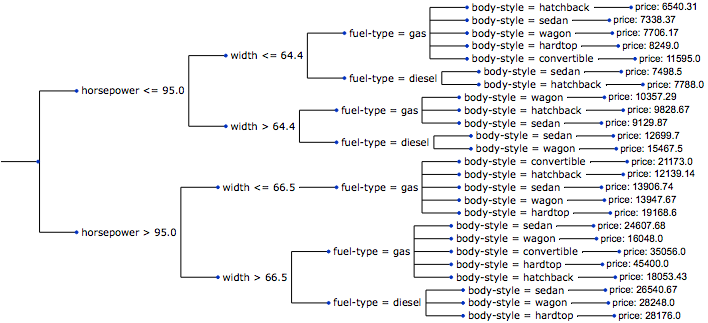

In [44]:
fields = ['horsepower', 'fuel-type', 'width', 'body-style', 'price']
df_auto = pd.read_csv('auto.csv', usecols=fields)

attrs = fields[:-1]
target_attr = fields[-1]

id3_auto = ID3(criterion='gini')
id3_auto.fit(df_auto, target_attr, attrs)
id3_auto.display_tree()

## 2.3. Pruning

Let us use the **Reduced Error Pruning** (REP) algorithm to prune the tree.
The decision tree is built on the train data, and then pruned to optimize the validation data.

The dataset used is about predicting the sex of crustaceans (*categorical value*) based on several attributes, all *continuous*.

See http://archive.ics.uci.edu/ml/datasets/Abalone

In [126]:
df_abalone = pd.read_csv('abalone.csv')

attrs = df_abalone.columns.tolist()[1:]
target_attr = df_abalone.columns.tolist()[0]

# 60% train, 20% validate, 20% test
np.random.seed(1)
train, validate, test = np.split(df_abalone.sample(frac=1), [int(.6*len(df_abalone)), int(.8*len(df_abalone))])
train.shape, validate.shape, test.shape

((2506, 9), (835, 9), (836, 9))

In [127]:
id3_abalone = ID3(criterion='gini')
id3_abalone.fit(train, target_attr, attrs)

print('Train:', id3_prune.score(train))
print('Validate:', id3_prune.score(validate))
print('Test:', id3_prune.score(test))

Train: 0.568635275339186
Validate: 0.6550898203592814
Test: 0.5311004784688995


In [128]:
id3_abalone.prune(validate)

print('Train:', id3_prune.score(train))
print('Validate:', id3_prune.score(validate))
print('Test:', id3_prune.score(test))

Train: 0.568635275339186
Validate: 0.6550898203592814
Test: 0.5311004784688995


As predicted, because we tried to optimize on `validation`, the score on `validation` rised while the score on `train` fell a bit. Overall because our model generalize better, the score on `test` may be a bit higher also.

# 3. Benchmark

http://archive.ics.uci.edu/ml/datasets/Wine+Quality

In [139]:
df_wine = pd.read_csv('winequality-white.csv', sep=';', dtype={'quality': np.object})

attrs = df_wine.columns.tolist()[:-1]
target_attr = df_wine.columns.tolist()[-1]

idx = np.random.rand(len(df_wine)) < 0.8
test_wine = df_wine[~idx]
train_validation_wine = df_wine[idx]

train_validation_wine.shape, test.shape

((3907, 12), (836, 9))

In [143]:
accuracy_me = 0
accuracy_sklearn = 0
n_splits = 5

kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)
for idx_train, idx_val in kf.split(train_validation_wine):
    df_train = df_wine.iloc[idx_train]
    df_val = df_wine.iloc[idx_val]
    
    id3_wine = ID3(criterion='gini')
    id3_wine.fit(df_train, target_attr, attrs)
    id3_wine.prune(df_val)
    
    dtree = DecisionTreeClassifier()
    dtree.fit(df_train[attrs], df_train[target_attr])
    
    accuracy_sklearn += dtree.score(test_wine[attrs], test_wine[target_attr])
    accuracy_me += id3_wine.score(test_wine)

    
print('Handmade decision tree:')
print('Score on kfold ({} splits): {}'.format(n_splits, accuracy_me/n_splits))

print('Sklearn decision tree:')
print('Score on kfold ({} splits): {}'.format(n_splits, accuracy_sklearn/n_splits))

Handmade decision tree:
Score on kfold (5 splits): 0.6294651866801211
Sklearn decision tree:
Score on kfold (5 splits): 0.8139253279515639
